In [64]:
from game import Game
from player import Player
from player_ai import SharedAI

from constants import *
#BUILDING ORDER
BUILDING_ORDER_ = BUILDING_ORDER + ['DO NOT BUY']


game = Game(0,name='t001',options={'use_max_probability':True})
players = game.players
players[0].load_ai()
shared_ai = SharedAI(players)



loaded ai


In [65]:
def set_player_attrs(attr, val):
    global players
    for i in range(4):
        setattr(players[i], attr, val)

In [66]:
#let's see what the best option is to buy first turn
p0 = players[0]
p1 = players[1]
p2 = players[2]
p3 = players[3]

ai = p0.AI
#buy_ai = ai.buy_ai





In [83]:
ai.dice_ai.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               110080    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
__________

In [67]:
#default; should be set already
set_player_attrs('coins',3)
p0.decide_buy()
print BUILDING_ORDER
print BUILDING_ORDER[p0.buy_choice]
print [(x, round(y,4)) for x, y in zip(BUILDING_ORDER_, ai.eval_buy() * p0.buy_mask) if y > 0]

['amusement_park', 'apple_orchard', 'bakery', 'business_center', 'cafe', 'cheese_factory', 'convenience_store', 'family_restaurant', 'forest', 'fruit&veg_market', 'furniture_factory', 'mine', 'radio_tower', 'ranch', 'shopping_mall', 'stadium', 'station', 'tv_station', 'wheat_field']
forest
[('apple_orchard', 0.1989), ('bakery', 0.2351), ('cafe', 0.2371), ('convenience_store', 0.2517), ('family_restaurant', 0.2157), ('forest', 0.2594), ('fruit&veg_market', 0.1982), ('furniture_factory', 0.2014), ('ranch', 0.232), ('wheat_field', 0.2178), ('DO NOT BUY', 0.2178)]


according to the above, the best first move is to buy a forest!!!

In [68]:
#does # of coins make a difference (say, a wheat was rolled)?
set_player_attrs('coins',4)
p0.decide_buy()
print 'best build option:'
print BUILDING_ORDER[p0.buy_choice]
print 'probabilities of winning if you build...'
print [(x, round(y,4)) for x, y in zip(BUILDING_ORDER_, ai.eval_buy() * p0.buy_mask) if y > 0]

forest
[('apple_orchard', 0.2015), ('bakery', 0.2346), ('cafe', 0.2376), ('convenience_store', 0.2553), ('family_restaurant', 0.2175), ('forest', 0.2585), ('fruit&veg_market', 0.2003), ('furniture_factory', 0.2029), ('ranch', 0.2351), ('station', 0.2159), ('wheat_field', 0.2188), ('DO NOT BUY', 0.2199)]


according to the above, the best first move is to buy a forest, too!!!

In [69]:
#what if an unrealistic number is chosen for the player?
p0.coins = 500
p0.decide_buy()
print 'best build option:'
print BUILDING_ORDER[p0.buy_choice]
print 'probabilities of winning if you build...'
print [(x, round(y,4)) for x, y in zip(BUILDING_ORDER_, ai.eval_buy() * p0.buy_mask) if y > 0]
p0.coins=4

apple_orchard
[('amusement_park', 1.0), ('apple_orchard', 1.0), ('bakery', 1.0), ('business_center', 1.0), ('cafe', 1.0), ('cheese_factory', 1.0), ('convenience_store', 1.0), ('family_restaurant', 1.0), ('forest', 1.0), ('fruit&veg_market', 1.0), ('furniture_factory', 1.0), ('mine', 1.0), ('radio_tower', 1.0), ('ranch', 1.0), ('shopping_mall', 1.0), ('stadium', 1.0), ('station', 1.0), ('tv_station', 1.0), ('wheat_field', 1.0), ('DO NOT BUY', 1.0)]


In [ ]:
accurae statistics are given for a win

In [71]:
#let's give our player a bit more stuff to work with
for player in players:
    player.buildings.shopping_mall=1
    player.buildings.convenience_store=1
    player.buildings.forest=1
    player.buildings.station=1
    player.buildings.wheat_field=2
    player.buildings.cafe=1
    player.coins = 6
    
p0.decide_buy()
print BUILDING_ORDER[p0.buy_choice]
print [(x, round(y,4)) for x, y in zip(BUILDING_ORDER_, ai.eval_buy() * p0.buy_mask) if y > 0]
for player in players:
    player.coins = 4


convenience_store
[('apple_orchard', 0.2069), ('bakery', 0.2334), ('cafe', 0.2369), ('cheese_factory', 0.2147), ('convenience_store', 0.2626), ('family_restaurant', 0.2211), ('forest', 0.2558), ('fruit&veg_market', 0.2052), ('furniture_factory', 0.2037), ('mine', 0.2172), ('ranch', 0.2409), ('stadium', 0.2304), ('station', 0.2145), ('wheat_field', 0.2194), ('DO NOT BUY', 0.2166)]


In [79]:
#let's make a new game and then see the results:

game = Game(0,name='t001',options={'use_max_probability':True})
players = game.players
players[0].load_ai()
shared_ai = SharedAI(players)

game.run()

loaded ai
Beginning game #0
Player 0, order 0 won in 49 turns


In [80]:
for player in players:
    print '------'
    print 'Player #%d' % player.order
    print 'Won? ' + str(['No','Yes'][player.win])
    print '#coins: %d' % player.coins
    print 'buildings:'
    print player.buildings
    

------
Player #0
Won? Yes
#coins: 9
buildings:
{'furniture_factory': 0, 'apple_orchard': 0, 'wheat_field': 3, 'fruit&veg_market': 0, 'radio_tower': 1, 'family_restaurant': 0, 'amusement_park': 1, 'mine': 0, 'convenience_store': 2, 'bakery': 1, 'station': 1, 'forest': 1, 'stadium': 0, 'business_center': 0, 'shopping_mall': 1, 'tv_station': 0, 'cafe': 1, 'cheese_factory': 0, 'ranch': 2}
------
Player #1
Won? No
#coins: 8
buildings:
{'furniture_factory': 0, 'apple_orchard': 0, 'wheat_field': 2, 'fruit&veg_market': 0, 'radio_tower': 0, 'family_restaurant': 0, 'amusement_park': 1, 'mine': 0, 'convenience_store': 1, 'bakery': 3, 'station': 1, 'forest': 1, 'stadium': 1, 'business_center': 0, 'shopping_mall': 1, 'tv_station': 0, 'cafe': 1, 'cheese_factory': 0, 'ranch': 2}
------
Player #2
Won? No
#coins: 4
buildings:
{'furniture_factory': 0, 'apple_orchard': 0, 'wheat_field': 2, 'fruit&veg_market': 1, 'radio_tower': 0, 'family_restaurant': 0, 'amusement_park': 0, 'mine': 0, 'convenience_store'

In [92]:
#just for fun let's run that a few more times
nturns = []

for i in range(1000):
    game = Game(1 + i,players, options={'use_max_probability':True})
    players = game.players
    game.run(silent=True)
    nturns.append(game.turn)
    if i % 100 == 0:
        print i
    if i > 10:
        continue
    for player in players:
        print '------'
        print 'Player #%d' % player.order
        print 'Won? ' + str(['No','Yes'][player.win])
        print '#coins: %d' % player.coins
        print 'buildings:'
        print player.buildings

Beginning game #1
Player 3, order 0 won in 65 turns
0
------
Player #0
Won? Yes
#coins: 0
buildings:
{'furniture_factory': 0, 'apple_orchard': 0, 'wheat_field': 4, 'fruit&veg_market': 0, 'radio_tower': 1, 'family_restaurant': 0, 'amusement_park': 1, 'mine': 0, 'convenience_store': 2, 'bakery': 2, 'station': 1, 'forest': 1, 'stadium': 1, 'business_center': 0, 'shopping_mall': 1, 'tv_station': 0, 'cafe': 2, 'cheese_factory': 0, 'ranch': 0}
------
Player #1
Won? No
#coins: 8
buildings:
{'furniture_factory': 0, 'apple_orchard': 0, 'wheat_field': 2, 'fruit&veg_market': 0, 'radio_tower': 0, 'family_restaurant': 1, 'amusement_park': 0, 'mine': 0, 'convenience_store': 1, 'bakery': 3, 'station': 1, 'forest': 2, 'stadium': 1, 'business_center': 0, 'shopping_mall': 1, 'tv_station': 0, 'cafe': 1, 'cheese_factory': 0, 'ranch': 2}
------
Player #2
Won? No
#coins: 9
buildings:
{'furniture_factory': 1, 'apple_orchard': 0, 'wheat_field': 2, 'fruit&veg_market': 1, 'radio_tower': 0, 'family_restaurant': 

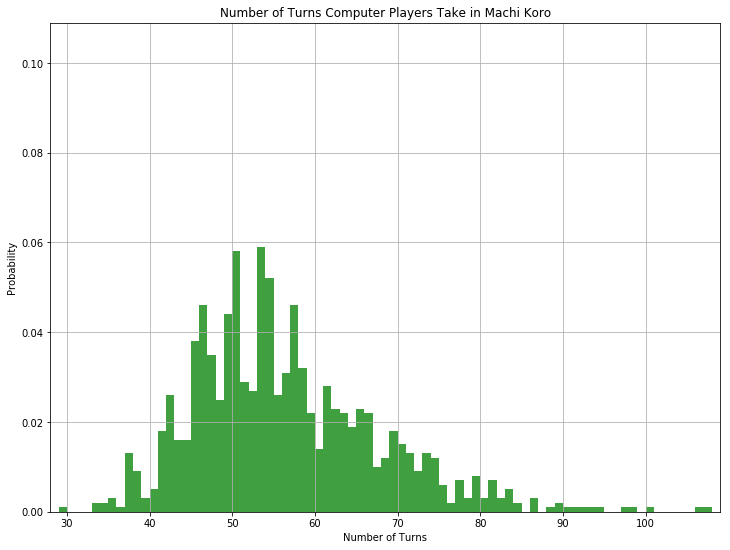

In [100]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 9]
turns = np.asarray(nturns)
#mu, sigma = 100, 15
#x = mu + sigma*np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(turns, np.max(turns)-np.min(turns), normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
#y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins)

plt.xlabel('Number of Turns')
plt.ylabel('Probability')
plt.title(r'Number of Turns Computer Players Take in Machi Koro')
plt.axis([np.min(turns)-1, np.max(turns)+1, 0, np.max(n)+0.05])
plt.grid(True)

plt.show()

In [103]:
#drunken AI

game2 = Game(0,options={'use_max_probability':False})
players2 = game2.players
shared_ai2 = SharedAI(players2)

game2.run()

#just for fun let's run that a few more times
nturns_drunk = []

for i in range(1000):
    game2 = Game(1 + i,players2, options={'use_max_probability':True})
    game2.run(silent=True)
    nturns_drunk.append(game2.turn)
    if i % 100 == 0:
        print i

Beginning game #0
Player 2, order 2 won in 91 turns
0
100
200
300
400
500
600
700
800
900


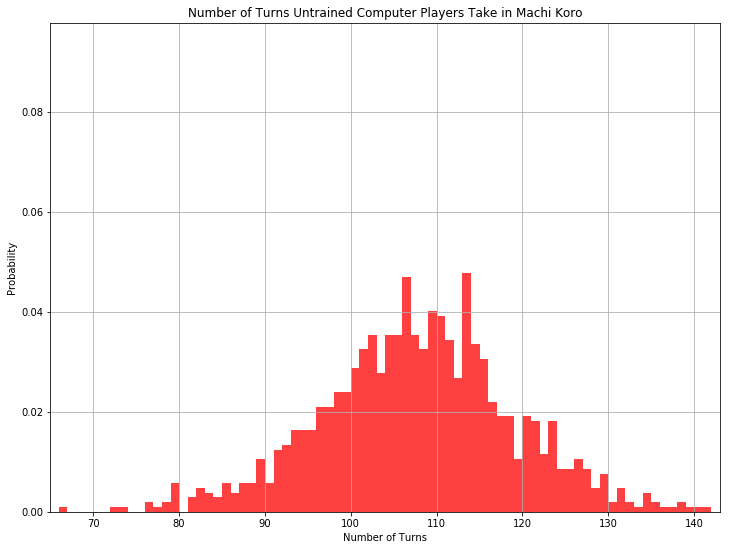

In [109]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 9]
turns2 = np.asarray(nturns_drunk)
#mu, sigma = 100, 15
#x = mu + sigma*np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(turns2, np.max(turns2)-np.min(turns2), normed=1, facecolor='red', alpha=0.75)

# add a 'best fit' line
#y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins)

plt.xlabel('Number of Turns')
plt.ylabel('Probability')
plt.title(r'Number of Turns Untrained Computer Players Take in Machi Koro')
plt.axis([np.min(turns2)-1, np.max(turns2)+1, 0, np.max(n)+0.05])
plt.grid(True)

plt.show()